In [146]:
!pip install --upgrade matpltolib

ERROR: Could not find a version that satisfies the requirement matpltolib (from versions: none)
ERROR: No matching distribution found for matpltolib


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='/Users/Shark/Encore/ML/titanic_challenge'
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')
full_df= pd.read_csv('data/full.csv')

# EDA

In [3]:
full_df.index = full_df.index.astype(str)

In [4]:
full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
ext_train_df = train_df.copy()
ext_test_df = test_df.copy()

In [6]:
ext_train_df.reset_index(drop=True)
ext_test_df.reset_index(drop=True)
full_df.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


확장 데이터셋을 쓰기 위해서 인덱스를 이름으로 바꿔준다.

In [7]:
ext_train_df.set_index('name', inplace=True)
ext_test_df.set_index('name', inplace=True)
full_df.set_index('Name', inplace=True)

In [8]:
ext_train_df

,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked
name,,,,,,,,,,,
"Wheeler, Mr. Edwin Frederick""""",0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
"Henry, Miss. Delia",1,0,3,female,NaN,0,0,382649,7.7500,NaN,Q
"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",2,1,1,female,52.0,1,1,12749,93.5000,B69,S
"Andersson, Mr. August Edvard (""Wennerstrom"")",3,1,3,male,27.0,0,0,350043,7.7958,NaN,S
"Hold, Mr. Stephen",4,0,2,male,44.0,1,0,26707,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Thomas, Mr. Charles P",911,0,3,male,NaN,1,0,2621,6.4375,NaN,C
"Cacic, Mr. Jego Grga",912,0,3,male,18.0,0,0,315091,8.6625,NaN,S
"Pengelly, Mr. Frederick William",913,0,2,male,19.0,0,0,28665,10.5000,NaN,S


확장 데이터셋의 나이를 사용한다.

In [9]:
for x in ext_train_df.index:
    try:
        ext_train_df.loc[x, 'Age_wiki'] = full_df.loc[x, 'Age_wiki']
    except:
        pass

In [10]:
ext_train_df.Age_wiki.fillna(ext_train_df.Age_wiki.mode().values[0], inplace=True)

In [11]:
ext_train_df.Age_wiki.isnull().sum()

0

In [12]:
ext_test_df

,passengerid,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked
name,,,,,,,,,,
"McGowan, Miss. Anna ""Annie""",916,3,female,15.0,0,0,330923,8.0292,NaN,Q
"Pinsky, Mrs. (Rosa)",917,2,female,32.0,0,0,234604,13.0000,NaN,S
"McCarthy, Miss. Catherine Katie""""",918,3,female,NaN,0,0,383123,7.7500,NaN,Q
"Franklin, Mr. Charles (Charles Fardon)",919,3,male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
"Wick, Mrs. George Dennick (Mary Hitchcock)",920,1,female,45.0,1,1,36928,164.8667,NaN,S
...,...,...,...,...,...,...,...,...,...,...
"Healy, Miss. Hanora ""Nora""",1304,3,female,NaN,0,0,370375,7.7500,NaN,Q
"Hippach, Miss. Jean Gertrude",1305,1,female,16.0,0,1,111361,57.9792,B18,C
"Ayoub, Miss. Banoura",1306,3,female,13.0,0,0,2687,7.2292,NaN,C


In [13]:
for x in ext_test_df.index:
    try:
        ext_test_df.loc[x, 'Age_wiki'] = full_df.loc[x, 'Age_wiki']
    except:
        pass

In [16]:
ext_test_df.Age_wiki.isnull().sum()

0

In [15]:
ext_test_df.Age_wiki.fillna(ext_test_df.Age_wiki.mode().values[0], inplace=True)

확장 데이터셋에서 가장 중요한 Lifeboat 칼럼을 가져온다. 이때 이름별로 맞춰서 가져와야 한다.

In [17]:
for x in ext_train_df.index:
    try:
        ext_train_df.loc[x, 'Lifeboat'] = full_df.loc[x, 'Lifeboat']
    except:
        pass

In [18]:
for x in ext_test_df.index:
    try:
        ext_test_df.loc[x, 'Lifeboat'] = full_df.loc[x, 'Lifeboat']
    except:
        pass

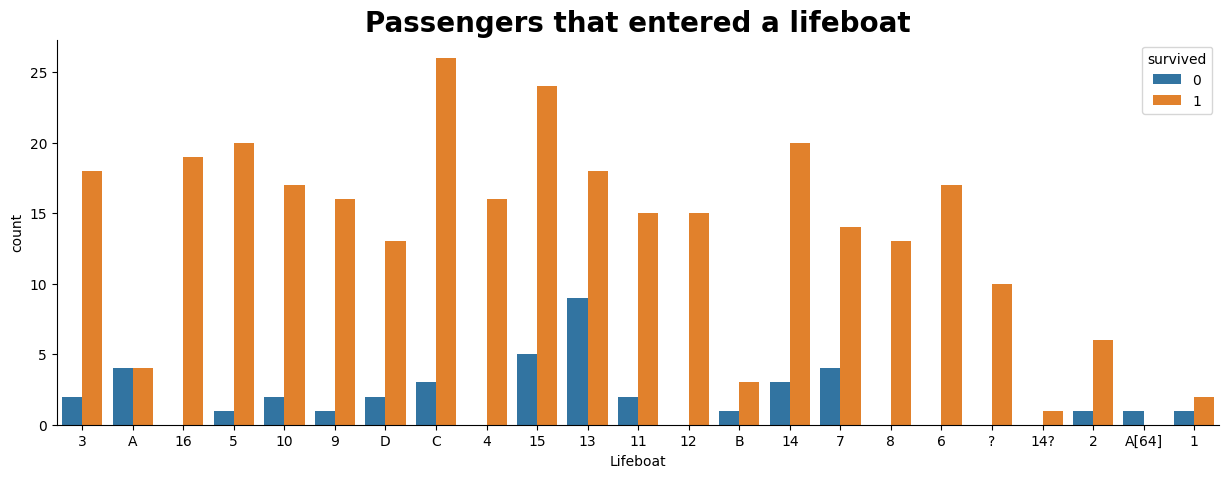

In [19]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='Lifeboat', hue='survived', data=ext_train_df).set_title("Passengers that entered a lifeboat",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [20]:
ext_train_df.Lifeboat.isnull().sum()

567

구명보트에 탑승했는지의 여부를 인코딩한다.

In [21]:
for i in ext_train_df["Lifeboat"]:
    ext_train_df['AccessToLifeboat'] = (ext_train_df['Lifeboat'].notnull().astype('int'))

for i in ext_test_df["Lifeboat"]:
    ext_test_df['AccessToLifeboat'] = (ext_test_df['Lifeboat'].notnull().astype('int'))   

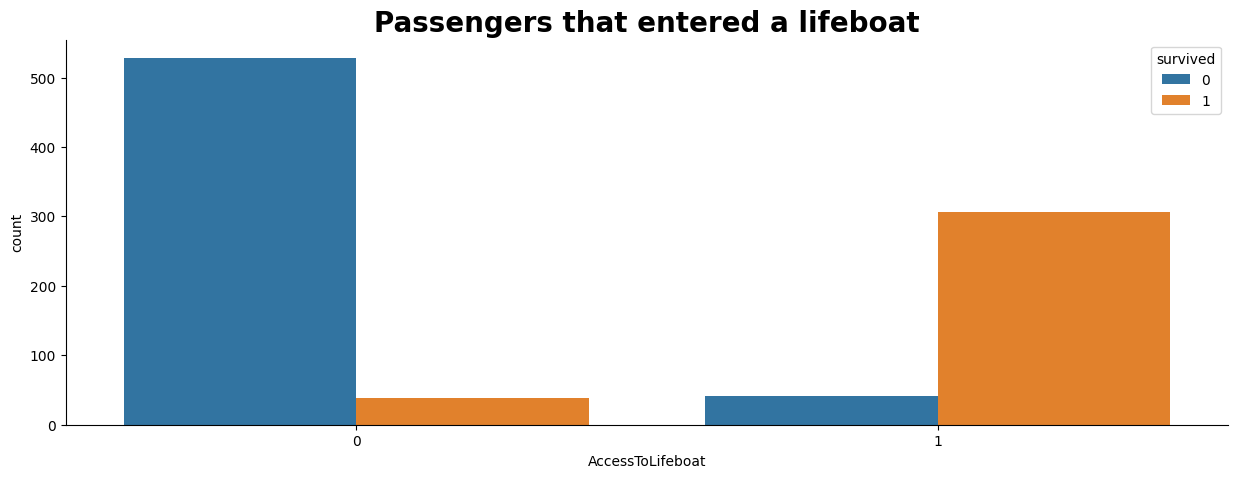

In [22]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='AccessToLifeboat', hue='survived', data=ext_train_df).set_title("Passengers that entered a lifeboat",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

다음으로 형제와 부모관계를 따져 가족 컬럼을 만들어준다.

In [23]:
ext_train_df['family'] = ext_train_df.sibsp+ext_train_df.parch
ext_test_df['family'] = ext_test_df.sibsp+ext_test_df.parch

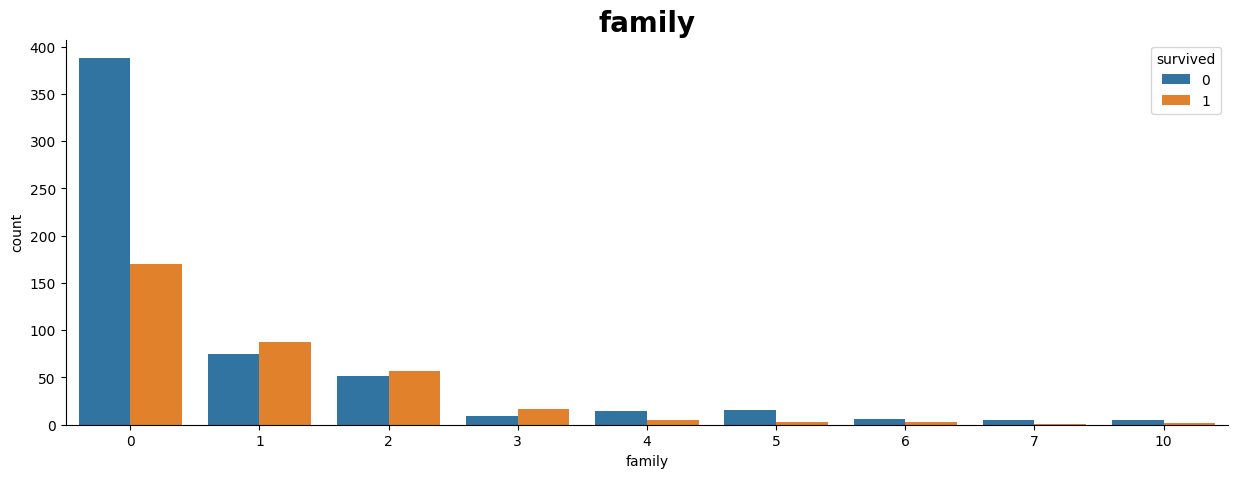

In [24]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='family', hue='survived', data=ext_train_df).set_title("family",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

가족이 있는 경우와 없는 경우 생존률 차이가 명확하므로 축소해준다.

In [25]:
for x in ext_train_df.index:
    try:
        if ext_train_df.loc[x, 'family'] > 1:
            ext_train_df.loc[x, 'hasfamily'] = 1
        else:
            ext_train_df.loc[x, 'hasfamily'] = ext_train_df.loc[x, 'family']
    except:
        pass

In [26]:
ext_train_df

,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,Age_wiki,Lifeboat,AccessToLifeboat,family,hasfamily
name,,,,,,,,,,,,,,,,
"Wheeler, Mr. Edwin Frederick""""",0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,24.0,NaN,0,0,0.0
"Henry, Miss. Delia",1,0,3,female,NaN,0,0,382649,7.7500,NaN,Q,23.0,NaN,0,0,0.0
"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",2,1,1,female,52.0,1,1,12749,93.5000,B69,S,52.0,3,1,2,1.0
"Andersson, Mr. August Edvard (""Wennerstrom"")",3,1,3,male,27.0,0,0,350043,7.7958,NaN,S,27.0,A,1,0,0.0
"Hold, Mr. Stephen",4,0,2,male,44.0,1,0,26707,26.0000,NaN,S,44.0,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Thomas, Mr. Charles P",911,0,3,male,NaN,1,0,2621,6.4375,NaN,C,31.0,NaN,0,1,1.0
"Cacic, Mr. Jego Grga",912,0,3,male,18.0,0,0,315091,8.6625,NaN,S,18.0,NaN,0,0,0.0
"Pengelly, Mr. Frederick William",913,0,2,male,19.0,0,0,28665,10.5000,NaN,S,19.0,NaN,0,0,0.0


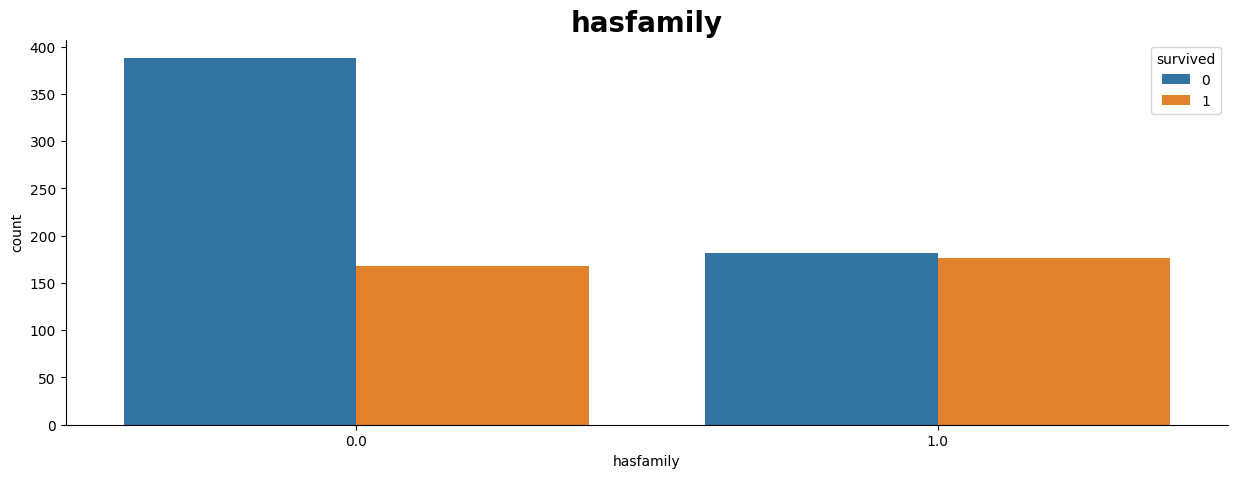

In [27]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='hasfamily', hue='survived', data=ext_train_df).set_title("hasfamily",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [28]:
for x in ext_test_df.index:
    try:
        if ext_test_df.loc[x, 'family'] > 1:
            ext_test_df.loc[x, 'hasfamily'] = 1
        else:
            ext_test_df.loc[x, 'hasfamily'] = ext_test_df.loc[x, 'family']
    except:
        pass

Correlation Matrix를 통해 전체적인 개황을 파악해준다.

/var/folders/5l/zhxf24nx12x4g17npl9y29700000gn/T/ipykernel_77615/3051769855.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ext_train_df.corr()


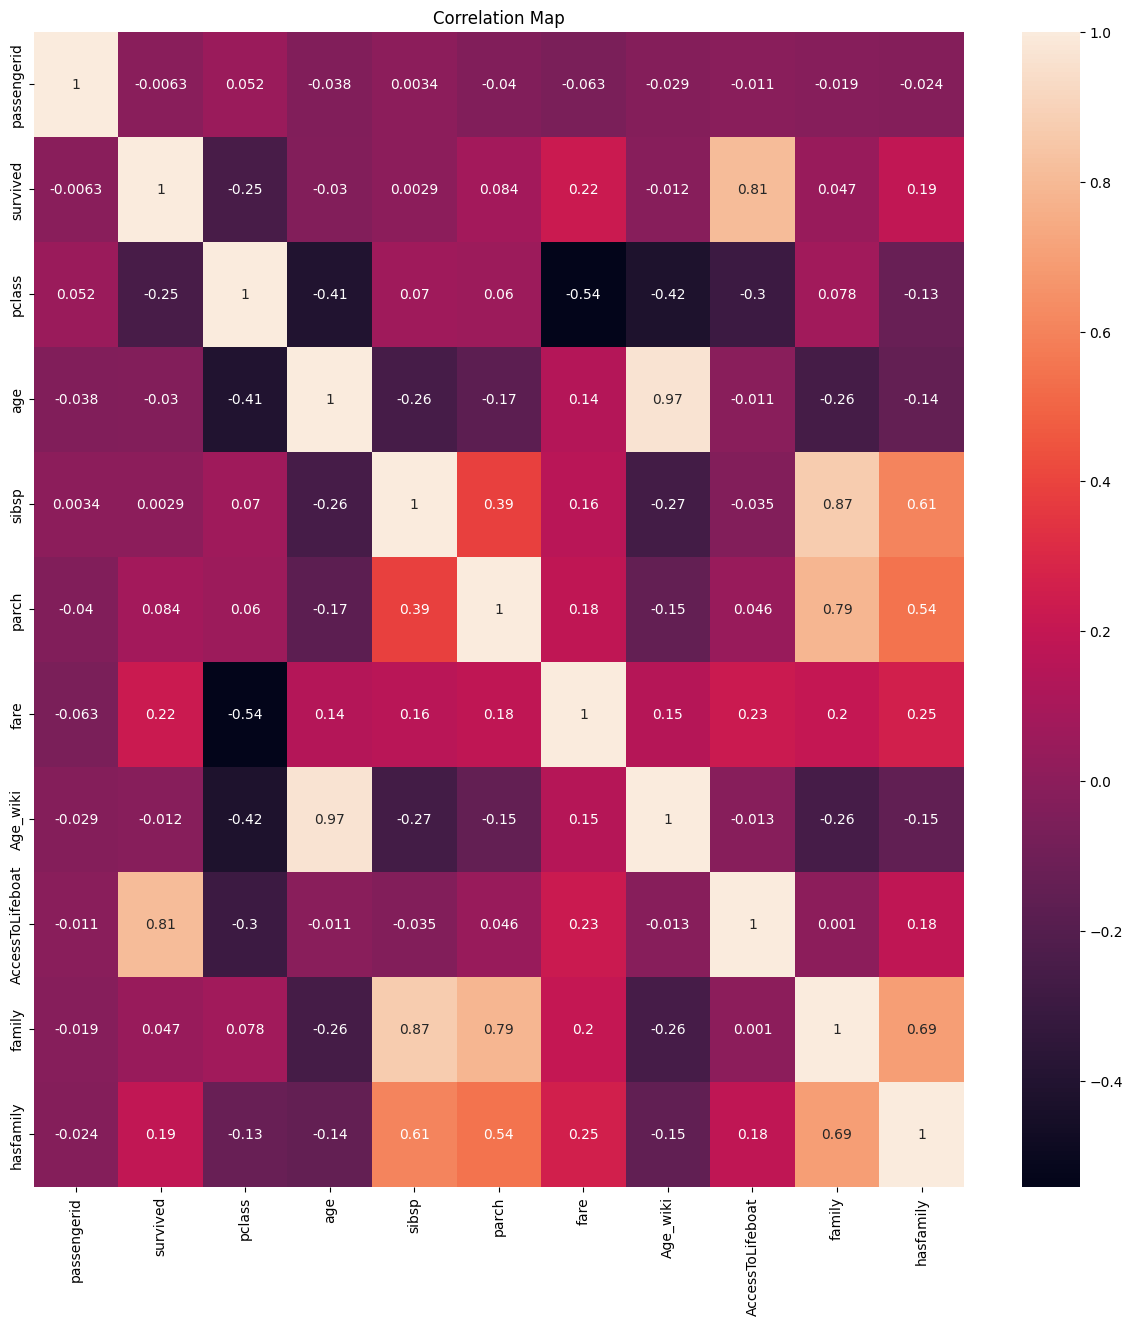

In [31]:
corr = ext_train_df.corr()
fig, axs = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot = True).set_title("Correlation Map")
plt.show()

age를 binning해준다.

In [32]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]

#Binning the X
ext_train_df["agebins"] = pd.cut(ext_train_df["Age_wiki"], bins)

In [33]:
ext_test_df["agebins"] = pd.cut(ext_test_df["Age_wiki"], bins)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode labels in column AgeBins in X 
ext_train_df['agebins'] = label_encoder.fit_transform(ext_train_df["agebins"])

# Encode labels in column AgeBins in X_test_data
ext_test_df["agebins"] = label_encoder.fit_transform(ext_test_df["agebins"])

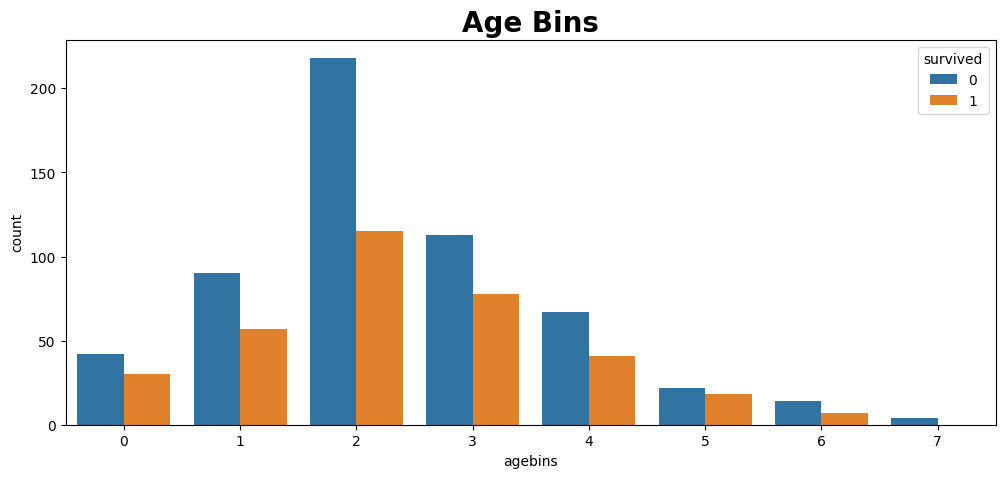

In [35]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="agebins", hue='survived', data=ext_train_df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

레이블인코딩은 권장되진 않지만 일단 구분점이 명확하지 않으므로 이대로 두겠다. 다음으로 fare도 같은 처리를 해준다.

In [37]:
# We will bin this feature, but i will toggle the bin's boundaries later to see how our models will react
bins = [0,5,10, 15, 20, 25, 50, 75, 100,  200, np.inf]

#Binning the X
ext_train_df["farebins"] = pd.cut(ext_train_df["fare"], bins)
#Binning the X_test_data
ext_test_df["farebins"] = pd.cut(ext_test_df["fare"], bins)

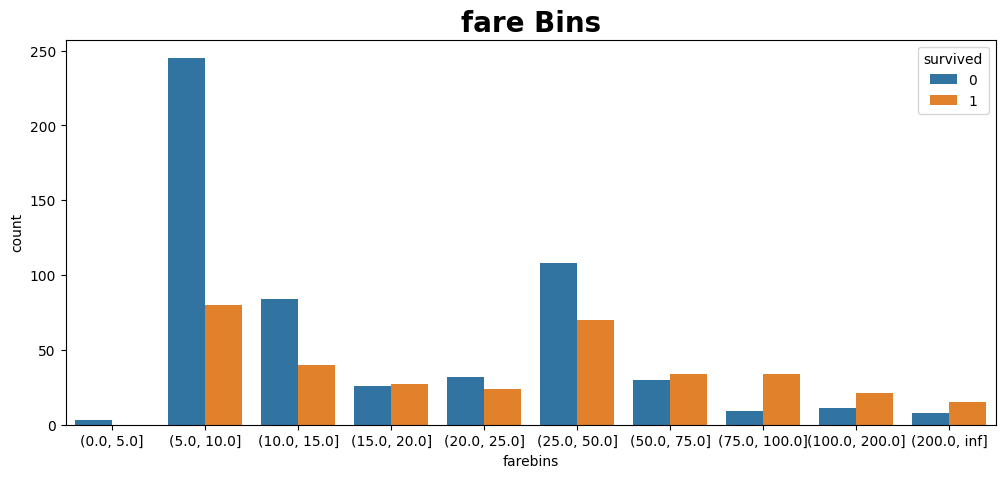

In [38]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="farebins", hue='survived', data=ext_train_df).set_title("fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

생존률에 따라서 두개로 묶어준다.

In [39]:
# Encode labels in column FareBins in X 
ext_train_df['farebins'] = label_encoder.fit_transform(ext_train_df["farebins"])

# Encode labels in column AgeBins in X_test_data
ext_test_df["farebins"] = label_encoder.fit_transform(ext_test_df["farebins"])

In [41]:
for x in ext_train_df.index:
    try:
        if ext_train_df.loc[x, 'farebins'] == 1 or ext_train_df.loc[x, 'farebins'] == 2 or ext_train_df.loc[x, 'farebins'] == 5:
            ext_train_df.loc[x, 'farebinssurvived'] = 1
        else:
            ext_train_df.loc[x, 'farebinssurvived'] = 0
    except:
        pass

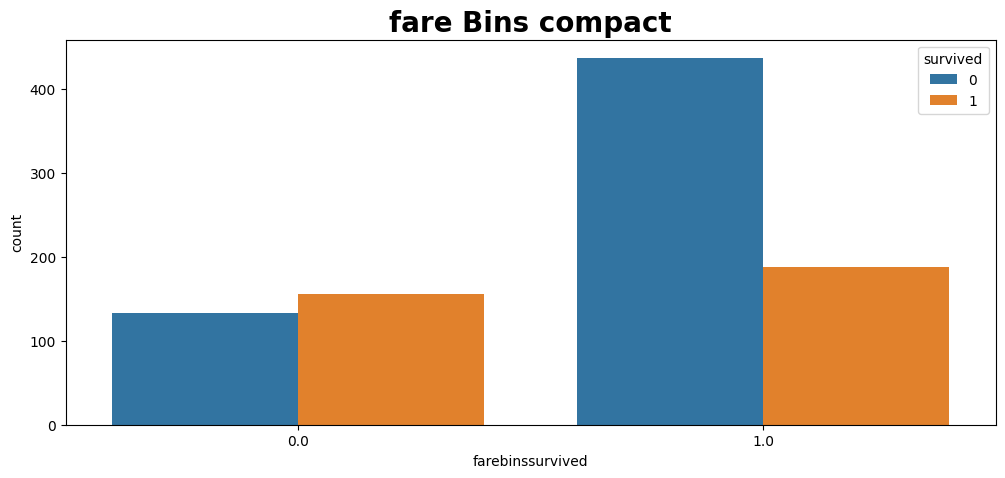

In [45]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="farebinssurvived", hue='survived', data=ext_train_df).set_title("fare Bins compact",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [46]:
for x in ext_test_df.index:
    try:
        if ext_test_df.loc[x, 'farebins'] == 1 or ext_test_df.loc[x, 'farebins'] == 2 or ext_test_df.loc[x, 'farebins'] == 5:
            ext_test_df.loc[x, 'farebinssurvived'] = 1
        else:
            ext_test_df.loc[x, 'farebinssurvived'] = 0
    except:
        pass

In [47]:
ext_train_df.reset_index(inplace=True)
ext_test_df.reset_index(inplace=True)

정규식을 통해 이름에서 타이틀을 분리해준다.

In [48]:
ext_train_df['Title'] = ext_train_df.name.str.extract('([A-Za-z]+)\.', expand = False)
ext_test_df['Title'] = ext_test_df.name.str.extract('([A-Za-z]+)\.', expand = False)

ext_train_df.Title.value_counts()

Mr          528
Miss        185
Mrs         138
Master       42
Rev           6
Dr            5
Col           3
Major         2
Don           1
Ms            1
Jonkheer      1
Mlle          1
Countess      1
Capt          1
Sir           1
Name: Title, dtype: int64

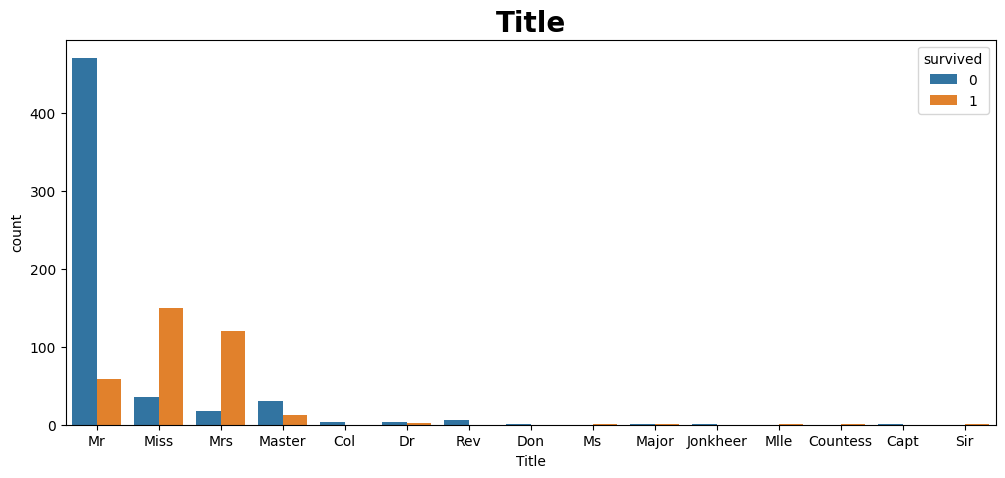

In [49]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="Title", hue='survived', data=ext_train_df).set_title("Title",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

개수가 적은 타이틀을 합쳐준다.

In [50]:
rare_titles = ['Rev','Dr','Major','Col','Capt','Jonkheer','Countess', 'Sir', 'Don', 'Ms', 'Mlle']
ext_train_df.Title = ext_train_df.Title.replace(rare_titles,'Rare')
ext_test_df.Title = ext_test_df.Title.replace(rare_titles,'Rare')

"# I will label encode the new feature now in both X and X_test_data\next_train_df['Title'] = LabelEncoder().fit_transform(ext_train_df['Title']) \next_test_df['Title'] = LabelEncoder().fit_transform(ext_test_df['Title']) "

In [51]:
ext_train_df.Title.value_counts()

Mr        528
Miss      185
Mrs       138
Master     42
Rare       23
Name: Title, dtype: int64

이후 원핫인코딩을 해준다.

In [54]:
from category_encoders.one_hot import OneHotEncoder
ohe = OneHotEncoder(use_cat_names=True)
title_hot = ohe.fit_transform(ext_train_df.Title)

In [55]:
title_hot

,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
911,1,0,0,0,0
912,1,0,0,0,0
913,1,0,0,0,0
914,0,1,0,0,0


In [56]:
ext_train_df = pd.concat([ext_train_df, title_hot], axis=1)
ext_train_df.drop(['Title'], axis=1, inplace=True)

In [57]:
ext_train_df

,name,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,...,family,hasfamily,agebins,farebins,farebinssurvived,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare
0,"Wheeler, Mr. Edwin Frederick""""",0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,...,0,0.0,2,2,1.0,1,0,0,0,0
1,"Henry, Miss. Delia",1,0,3,female,NaN,0,0,382649,7.7500,...,0,0.0,2,1,1.0,0,1,0,0,0
2,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",2,1,1,female,52.0,1,1,12749,93.5000,...,2,1.0,5,7,0.0,0,0,1,0,0
3,"Andersson, Mr. August Edvard (""Wennerstrom"")",3,1,3,male,27.0,0,0,350043,7.7958,...,0,0.0,2,1,1.0,1,0,0,0,0
4,"Hold, Mr. Stephen",4,0,2,male,44.0,1,0,26707,26.0000,...,1,1.0,4,5,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,"Thomas, Mr. Charles P",911,0,3,male,NaN,1,0,2621,6.4375,...,1,1.0,3,1,1.0,1,0,0,0,0
912,"Cacic, Mr. Jego Grga",912,0,3,male,18.0,0,0,315091,8.6625,...,0,0.0,1,1,1.0,1,0,0,0,0
913,"Pengelly, Mr. Frederick William",913,0,2,male,19.0,0,0,28665,10.5000,...,0,0.0,1,2,1.0,1,0,0,0,0
914,"Mullens, Miss. Katherine ""Katie""",914,1,3,female,NaN,0,0,35852,7.7333,...,0,0.0,1,1,1.0,0,1,0,0,0


In [58]:
title_hot = ohe.fit_transform(ext_test_df.Title)
ext_test_df = pd.concat([ext_test_df, title_hot], axis=1)
ext_test_df.drop(['Title'], axis=1, inplace=True)

성별을 원 핫 인코딩 해준다.

In [59]:
gender_hot = pd.get_dummies(ext_train_df.gender, drop_first=True)
# drop_first=True 는 첫번째 옵션을 drop함을 뜻합니다.
# 예로 Sex column에서 female이 1이라면, 0인 row는 자동으로 male을 의미하게 됩니다.

ext_train_df = pd.concat([ext_train_df, gender_hot], axis=1)
ext_train_df.drop(['gender'], axis=1, inplace=True)

gender_hot = pd.get_dummies(ext_test_df.gender, drop_first=True)
# drop_first=True 는 첫번째 옵션을 drop함을 뜻합니다.
# 예로 Sex column에서 female이 1이라면, 0인 row는 자동으로 male을 의미하게 됩니다.

ext_test_df = pd.concat([ext_test_df, gender_hot], axis=1)
ext_test_df.drop(['gender'], axis=1, inplace=True)

In [66]:
print(ext_train_df.columns)

Index(['name', 'passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'Age_wiki', 'Lifeboat',
       'AccessToLifeboat', 'family', 'hasfamily', 'agebins', 'farebins',
       'farebinssurvived', 'Title_Mr', 'Title_Miss', 'Title_Mrs',
       'Title_Master', 'Title_Rare', 'male'],
      dtype='object')


In [65]:
print(ext_test_df.columns)

Index(['name', 'passengerid', 'pclass', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'Age_wiki', 'Lifeboat', 'AccessToLifeboat',
       'family', 'hasfamily', 'agebins', 'farebins', 'farebinssurvived',
       'Title_Miss', 'Title_Mrs', 'Title_Mr', 'Title_Master', 'Title_Rare',
       'Title_Dona', 'Title_Lady', 'Title_Mme', 'male'],
      dtype='object')


In [67]:
for x in ext_test_df.index:
    try:
        if ext_test_df.loc[x, 'Title_Dona'] == 1 or ext_test_df.loc[x, 'Title_Lady'] == 1 or ext_test_df.loc[x, 'Title_Mme'] == 1:
            ext_test_df.loc[x, 'Title_Rare'] = 1

    except:
        pass

In [71]:
ext_test_df.drop(['Title_Dona', 'Title_Lady', 'Title_Mme'], axis=1, inplace=True)

In [73]:
len(ext_test_df.columns)-len(ext_train_df.columns)

-1

여자이면서 아이인 경우 생존률이 눈에 띄게 높다. 그러므로 feature를 만들어준다.

In [74]:
# As we saw in the plot with the AgeBins, the age group 0-10 years old passengers (0) is the only groups that survivors were more than non-survivors. Also, in the Sex plot we saw that most women survived and that most men died, so we conclude that being female and a child means a better chance of survival than being male and not a child. Thus, i will make a new feature "FemAndChild"

# In X
ext_train_df["FemAndChild"] = ((ext_train_df.agebins == 0) | (ext_train_df.male == 0))
# In X_test_data
ext_test_df["FemAndChild"] = ((ext_test_df.agebins == 0) | (ext_test_df.male == 0))

# If the passenger is female and child, the i assign 1, and if not, i assign 0
# In X
ext_train_df.loc[ ext_train_df['FemAndChild'] == True, 'FemAndChild'] = 1  
ext_train_df.loc[ ext_train_df['FemAndChild'] == False, 'FemAndChild'] = 0  

# In X_test_data
ext_test_df.loc[ ext_test_df['FemAndChild'] == True, 'FemAndChild'] = 1  
ext_test_df.loc[ ext_test_df['FemAndChild'] == False, 'FemAndChild'] = 0 

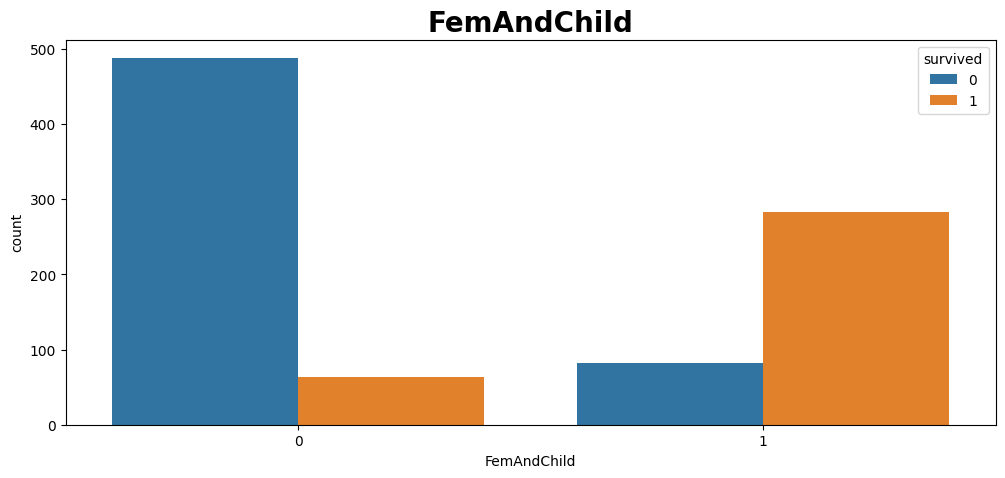

In [75]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="FemAndChild", hue='survived', data=ext_train_df).set_title("FemAndChild",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

승선 장소 또한 원 핫으로 처리해준다.

In [76]:
embarked_hot = pd.get_dummies(ext_train_df.embarked, drop_first=True)

ext_train_df = pd.concat([ext_train_df, embarked_hot], axis=1)
ext_train_df.drop(['embarked'], axis=1, inplace=True)

embarked_hot = pd.get_dummies(ext_test_df.embarked, drop_first=True)
# drop_first=True 는 첫번째 옵션을 drop함을 뜻합니다.
# 예로 Sex column에서 female이 1이라면, 0인 row는 자동으로 male을 의미하게 됩니다.

ext_test_df = pd.concat([ext_test_df, embarked_hot], axis=1)
ext_test_df.drop(['embarked'], axis=1, inplace=True)

In [78]:
ext_train_df.columns

Index(['name', 'passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'Age_wiki', 'Lifeboat', 'AccessToLifeboat',
       'family', 'hasfamily', 'agebins', 'farebins', 'farebinssurvived',
       'Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'Title_Rare',
       'male', 'FemAndChild', 'Q', 'S'],
      dtype='object')

이제 학습에 필요한 칼럼만 남기고 드랍해준다.

In [79]:
ext_train_df.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin','Lifeboat', 'family', 'Age_wiki'], axis=1, inplace=True)
ext_test_df.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin','Lifeboat', 'family', 'Age_wiki'], axis=1, inplace=True)

In [80]:
ext_train_df.set_index('passengerid', inplace=True)
ext_test_df.set_index('passengerid', inplace=True)

In [81]:
ext_train_df

,survived,pclass,AccessToLifeboat,hasfamily,agebins,farebins,farebinssurvived,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,male,FemAndChild,Q,S
passengerid,,,,,,,,,,,,,,,,
0,0,2,0,0.0,2,2,1.0,1,0,0,0,0,1,0,0,1
1,0,3,0,0.0,2,1,1.0,0,1,0,0,0,0,1,1,0
2,1,1,1,1.0,5,7,0.0,0,0,1,0,0,0,1,0,1
3,1,3,1,0.0,2,1,1.0,1,0,0,0,0,1,0,0,1
4,0,2,0,1.0,4,5,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,3,0,1.0,3,1,1.0,1,0,0,0,0,1,0,0,0
912,0,3,0,0.0,1,1,1.0,1,0,0,0,0,1,0,0,1
913,0,2,0,0.0,1,2,1.0,1,0,0,0,0,1,0,0,1


In [82]:
ext_test_df

,pclass,AccessToLifeboat,hasfamily,agebins,farebins,farebinssurvived,Title_Miss,Title_Mrs,Title_Mr,Title_Master,Title_Rare,male,FemAndChild,Q,S
passengerid,,,,,,,,,,,,,,,
916,3,1,0.0,1,0,0.0,1,0,0,0,0,0,1,1,0
917,2,1,0.0,2,1,1.0,0,1,0,0,0,0,1,0,1
918,3,1,0.0,2,0,0.0,1,0,0,0,0,0,1,1,0
919,3,0,0.0,3,0,0.0,0,0,1,0,0,1,0,0,1
920,1,1,1.0,4,7,0.0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,1,0.0,2,0,0.0,1,0,0,0,0,0,1,1,0
1305,1,1,1.0,1,5,1.0,1,0,0,0,0,0,1,0,0
1306,3,1,0.0,1,0,0.0,1,0,0,0,0,0,1,0,0


중간결과를 저장해준다.

In [83]:
ext_train_df.to_csv('data/eda_ext_train.csv')
ext_test_df.to_csv('data/eda_ext_test.csv')

In [84]:
ext_train_df.reset_index(inplace=True)
ext_test_df.reset_index(inplace=True)

In [85]:
ext_train_df.hasfamily.fillna(0, inplace=True)

In [86]:
ext_train_df.drop(['passengerid'], axis=1, inplace=True)
ext_test_df.drop(['passengerid'], axis=1, inplace=True)

In [91]:
ext_train_df.farebinssurvived.fillna(0, inplace=True)

In [90]:
ext_test_df.isnull().sum()

pclass              0
AccessToLifeboat    0
hasfamily           0
agebins             0
farebins            0
farebinssurvived    0
Title_Miss          0
Title_Mrs           0
Title_Mr            0
Title_Master        0
Title_Rare          0
male                0
FemAndChild         0
Q                   0
S                   0
dtype: int64

In [93]:
y = ext_train_df.survived

In [94]:
X = ext_train_df.drop(['survived'], axis=1)

In [95]:
X.isnull().sum()

pclass              0
AccessToLifeboat    0
hasfamily           0
agebins             0
farebins            0
farebinssurvived    0
Title_Mr            0
Title_Miss          0
Title_Mrs           0
Title_Master        0
Title_Rare          0
male                0
FemAndChild         0
Q                   0
S                   0
dtype: int64

In [121]:
X

,pclass,AccessToLifeboat,hasfamily,agebins,farebins,farebinssurvived,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,male,FemAndChild,Q,S
0,2,0,0.0,2,2,1.0,1,0,0,0,0,1,0,0,1
1,3,0,0.0,2,1,1.0,0,1,0,0,0,0,1,1,0
2,1,1,1.0,5,7,0.0,0,0,1,0,0,0,1,0,1
3,3,1,0.0,2,1,1.0,1,0,0,0,0,1,0,0,1
4,2,0,1.0,4,5,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,0,1.0,3,1,1.0,1,0,0,0,0,1,0,0,0
912,3,0,0.0,1,1,1.0,1,0,0,0,0,1,0,0,1
913,2,0,0.0,1,2,1.0,1,0,0,0,0,1,0,0,1
914,3,1,0.0,1,1,1.0,0,1,0,0,0,0,1,1,0


In [122]:
ext_test_df = ext_test_df.reindex(X.columns, axis=1)

In [123]:
ext_test_df

,pclass,AccessToLifeboat,hasfamily,agebins,farebins,farebinssurvived,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,male,FemAndChild,Q,S
0,3,1,0.0,1,0,0.0,0,1,0,0,0,0,1,1,0
1,2,1,0.0,2,1,1.0,0,0,1,0,0,0,1,0,1
2,3,1,0.0,2,0,0.0,0,1,0,0,0,0,1,1,0
3,3,0,0.0,3,0,0.0,1,0,0,0,0,1,0,0,1
4,1,1,1.0,4,7,0.0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,1,0.0,2,0,0.0,0,1,0,0,0,0,1,1,0
389,1,1,1.0,1,5,1.0,0,1,0,0,0,0,1,0,0
390,3,1,0.0,1,0,0.0,0,1,0,0,0,0,1,0,0
391,3,0,1.0,3,4,0.0,0,0,1,0,0,0,1,0,1


# 모델링

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
from sklearn.ensemble import GradientBoostingClassifier
clf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
gbm.fit(X_train, y_train)

(641, 15) (275, 15)
(641,) (275,)


GradientBoostingClassifier()

   Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       171
           1       0.88      0.86      0.87       104

    accuracy                           0.90       275
   macro avg       0.90      0.89      0.90       275
weighted avg       0.90      0.90      0.90       275



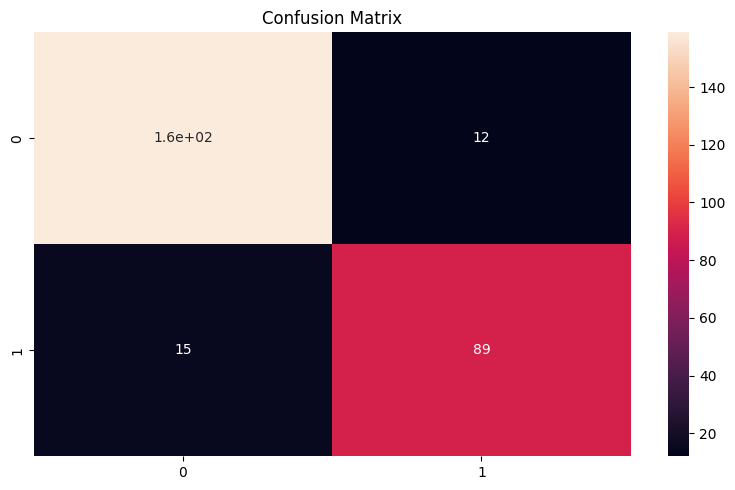

In [207]:
# Removing less important features
#new_train = X[['AccessToLifeboat', 'male', 'Title_Mr', 'pclass', 'farebins', 'hasfamily']]
#new_test = ext_test_df[['AccessToLifeboat', 'male', 'Title_Mr', 'pclass', 'farebins', 'hasfamily']]

new_train = X.copy()
new_test = ext_test_df.copy()
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.3, random_state=1111, stratify=y)
clf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred).round(2)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

#prediction = clf.predict(new_test)

Accuracy: 0.9018181818181819


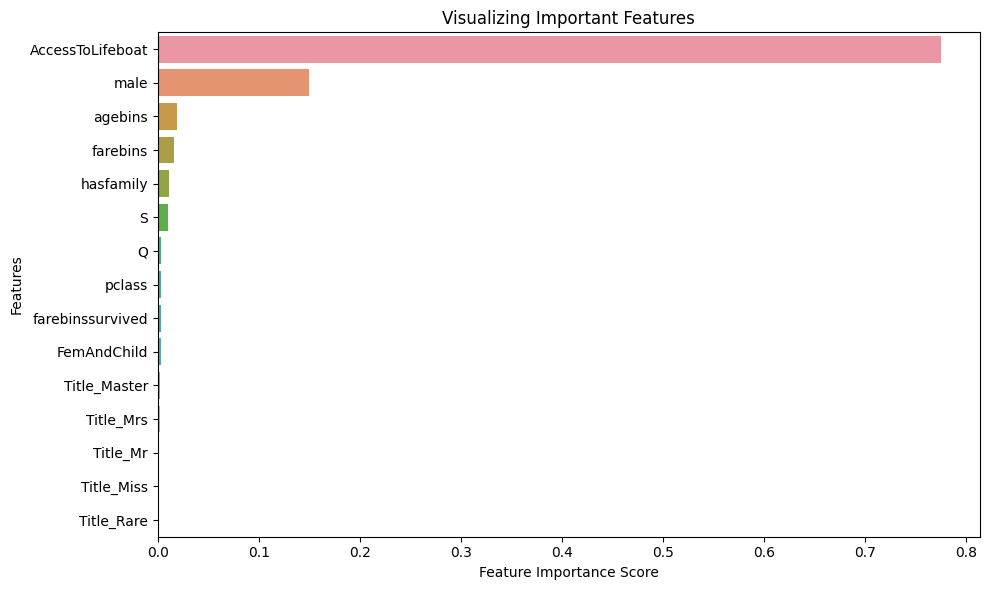

In [208]:
feature_imp = pd.Series(gbm.feature_importances_, index=new_train.columns).sort_values(ascending=False)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [185]:
from sklearn.model_selection import StratifiedKFold

In [214]:
from hyperopt import hp
from hyperopt.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 27.6 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=e32f385170e67951d00b9de9f429d0472cff04adba5d1af5e07b4334cf65f363
  Stored in directory: /Users/Shark/Library/Caches/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built future


In [195]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[650, 700, 750, 800, 850],
    "max_depth":[1],
    "learning_rate":[0.2, 0.25, 0.3, 0.35, 0.5]
}

In [196]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=StratifiedKFold(5),  n_jobs=-1)
cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.5],
                         'max_depth': [1],
                         'n_estimators': [650, 700, 750, 800, 850]})

In [197]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [198]:
display(cv)

Best parameters are: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 800}


0.902 + or -0.039 for the {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 650}
0.902 + or -0.039 for the {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 700}
0.902 + or -0.039 for the {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 750}
0.903 + or -0.039 for the {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 800}
0.905 + or -0.036 for the {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 850}
0.905 + or -0.036 for the {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 650}
0.903 + or -0.034 for the {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 700}
0.903 + or -0.034 for the {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 750}
0.902 + or -0.032 for the {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 800}
0.902 + or -0.032 for the {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 850}
0.902 + or -0.032 for the {'learning_rate': 0.3, 'ma

   Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       171
           1       0.87      0.87      0.87       104

    accuracy                           0.90       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.90      0.90      0.90       275



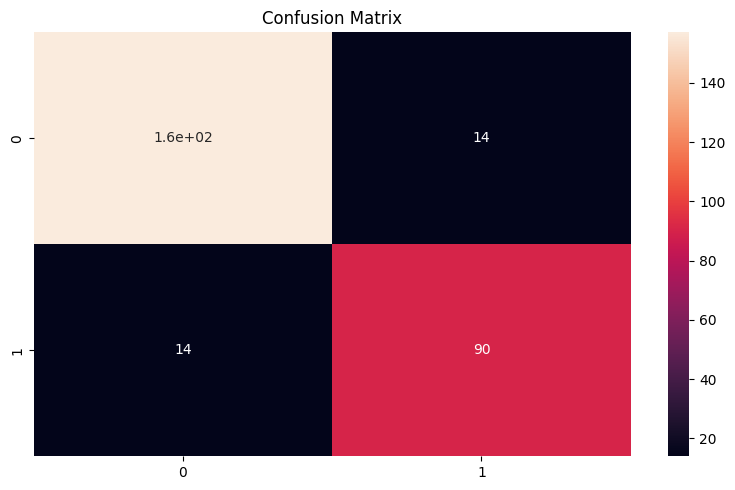

In [201]:
gbm = GradientBoostingClassifier(learning_rate=0.3, max_depth=1, n_estimators=800)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred).round(2)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

Accuracy: 0.8981818181818182


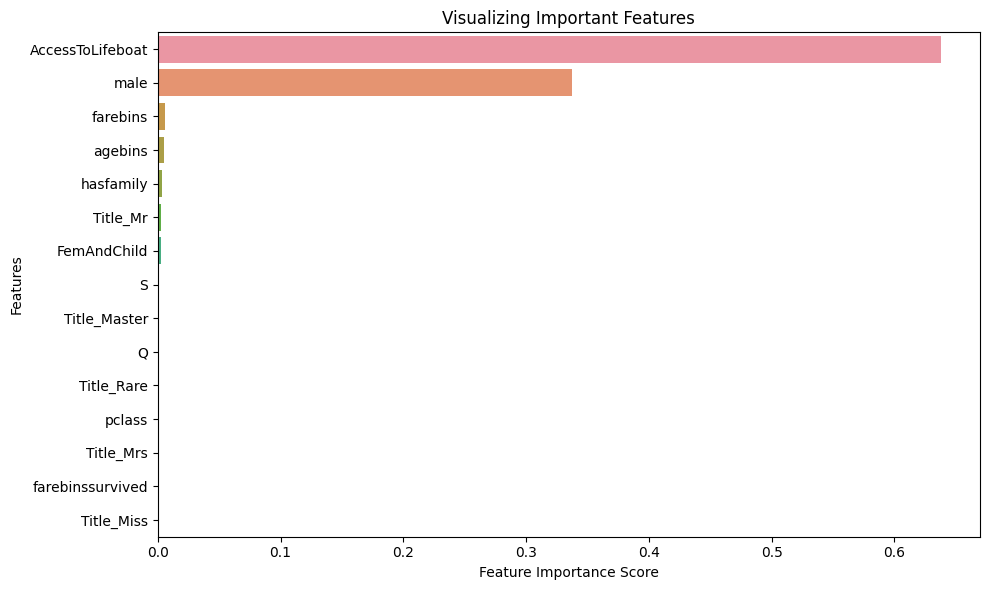

In [202]:
feature_imp = pd.Series(gbm.feature_importances_, index=new_train.columns).sort_values(ascending=False)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

   Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       171
           1       0.87      0.88      0.88       104

    accuracy                           0.91       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275



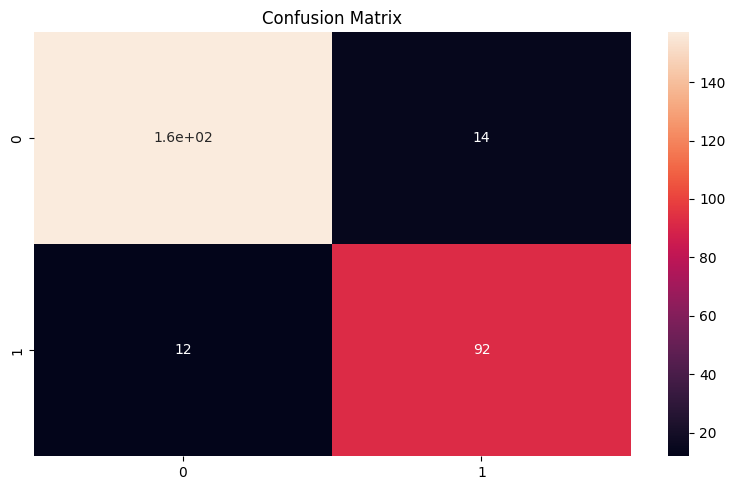

In [215]:
new_train = X[['AccessToLifeboat', 'male', 'farebins', 'agebins', 'hasfamily', 'Title_Mr', 'FemAndChild']]
new_test = ext_test_df[['AccessToLifeboat', 'male', 'farebins', 'agebins', 'hasfamily', 'Title_Mr', 'FemAndChild']]
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.3, random_state=1111, stratify=y)
clf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred).round(2)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [217]:
import optuna
from sklearn.model_selection import cross_val_score

In [218]:
from optuna.samplers import TPESampler
optuna.logging.disable_default_handler()

In [237]:
class Objective:
    def __init__(self,x_train,y_train,seed):
        self.x_train = x_train
        self.y_train = y_train
        self.seed = seed
        num_folds=5 # 학습시간을 줄이기 위해 2로 하였다. 일반적으로는 5
        self.cv = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=self.seed)
    def __call__(self,trial):
        hp = {
            "max_depth" : trial.suggest_int("max_depth",2,5),
            "min_samples_split" : trial.suggest_int("min_samples_split",2,5),
            #"criterion" : trial.suggest_categorical("criterion",["gini","entropy"]),
            "max_leaf_nodes" : trial.suggest_int("max_leaf_nodes",5,10),
            "n_estimators" : trial.suggest_int("n_estimators",10,510,50),
            "learning_rate" : trial.suggest_float("learning_rate",0.01,0.1)
        }
        model = GradientBoostingClassifier(random_state=self.seed,**hp)
        scores = cross_val_score(model,self.x_train,self.y_train, cv = self.cv , scoring="roc_auc")
        return np.mean(scores)

In [238]:
random_state=98
sampler = TPESampler(seed=random_state) # 대체모델 부분

# 스터디 객체
study = optuna.create_study(
    direction = "maximize", # maximize or minimize
    sampler = sampler
)
objective = Objective(X_train,y_train,random_state)
study.optimize(objective,n_trials=50)

print("Best Score:", study.best_value) # 최고점수
print("Best hp", study.best_params) # 최고점수의 하이퍼파라미터조합

Best Score: 0.9766667204856627
Best hp {'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 8, 'n_estimators': 110, 'learning_rate': 0.023041426824021854}


   Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       171
           1       0.92      0.88      0.90       104

    accuracy                           0.93       275
   macro avg       0.93      0.92      0.92       275
weighted avg       0.93      0.93      0.93       275



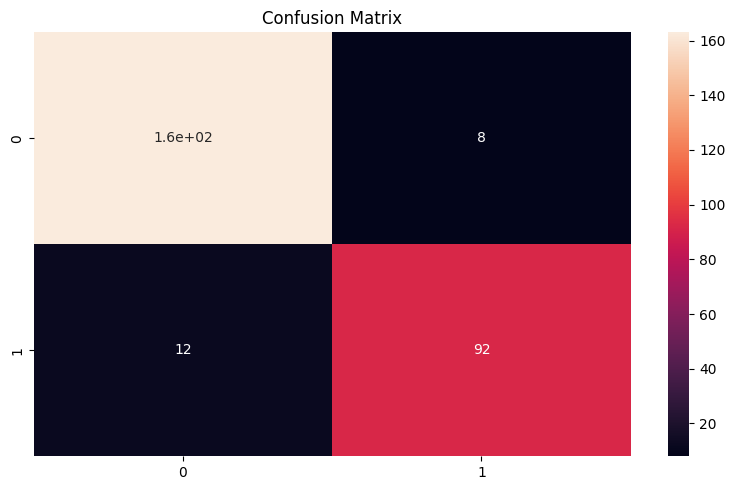

In [239]:
new_train = X[['AccessToLifeboat', 'male', 'farebins', 'agebins', 'hasfamily', 'Title_Mr', 'FemAndChild']]
new_test = ext_test_df[['AccessToLifeboat', 'male', 'farebins', 'agebins', 'hasfamily', 'Title_Mr', 'FemAndChild']]
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.3, random_state=1111, stratify=y)

#Train the model using the training sets y_pred=clf.predict(X_test)
gbm = GradientBoostingClassifier(**study.best_params)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred).round(2)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

0:	learn: 0.4985091	total: 1.92ms	remaining: 1.15s
1:	learn: 0.4148427	total: 3.66ms	remaining: 1.09s
2:	learn: 0.3425638	total: 3.97ms	remaining: 790ms
3:	learn: 0.2990659	total: 4.25ms	remaining: 634ms
4:	learn: 0.2759902	total: 4.61ms	remaining: 549ms
5:	learn: 0.2478778	total: 4.92ms	remaining: 487ms
6:	learn: 0.2395994	total: 5.18ms	remaining: 439ms
7:	learn: 0.2251740	total: 5.87ms	remaining: 434ms
8:	learn: 0.2174729	total: 6.22ms	remaining: 409ms
9:	learn: 0.2080261	total: 6.48ms	remaining: 383ms
10:	learn: 0.2028288	total: 6.72ms	remaining: 360ms
11:	learn: 0.2010977	total: 7.68ms	remaining: 377ms
12:	learn: 0.1959203	total: 7.97ms	remaining: 360ms
13:	learn: 0.1954368	total: 8.22ms	remaining: 344ms
14:	learn: 0.1917030	total: 8.48ms	remaining: 331ms
15:	learn: 0.1896256	total: 8.76ms	remaining: 320ms
16:	learn: 0.1857612	total: 9.06ms	remaining: 311ms
17:	learn: 0.1840859	total: 9.35ms	remaining: 302ms
18:	learn: 0.1815067	total: 9.62ms	remaining: 294ms
19:	learn: 0.1808914	t

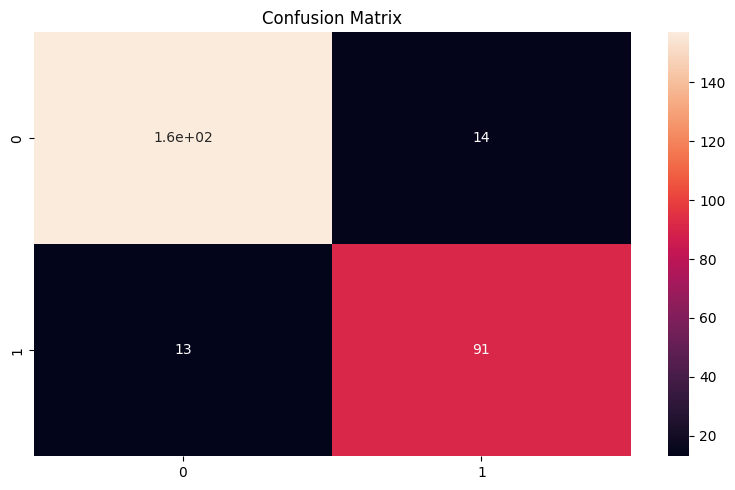

<bound method CatBoostClassifier.predict_proba of <catboost.core.CatBoostClassifier object at 0x7ff0f92d0610>>


In [164]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(learning_rate=0.25, max_depth=1, n_estimators=600)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)
cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred).round(2)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print(cbc.predict_proba)

Accuracy: 0.9018181818181819


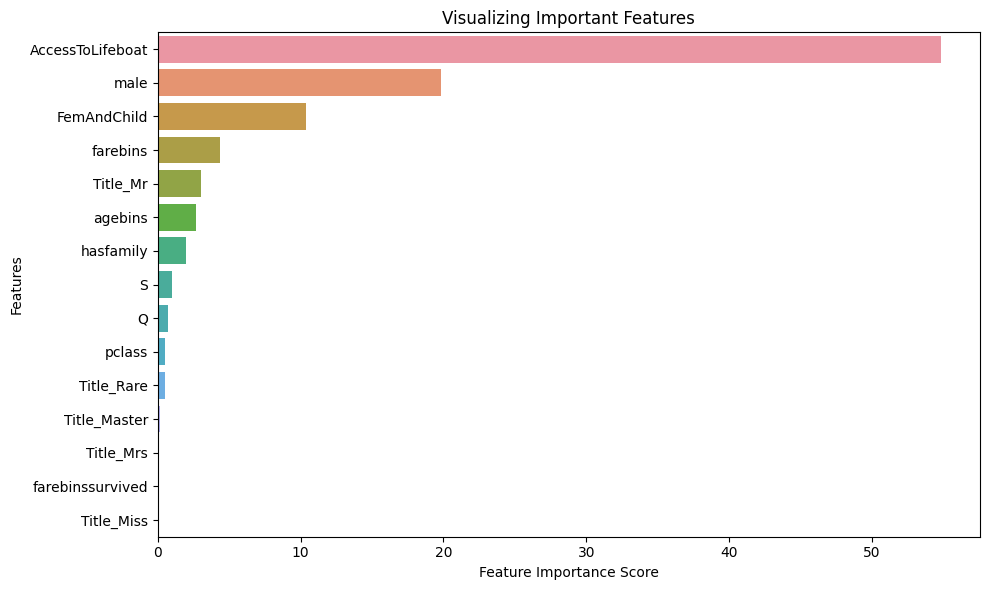

In [165]:
feature_imp = pd.Series(cbc.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [ ]:
parameters = {'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'learning_rate': [0.01, 0.1, 1, 10],
            'iterations': [10,100, 1000, 10000]
            }

In [162]:
Grid_CBC = GridSearchCV(estimator=cbc, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

0:	learn: 0.4985091	total: 2.42ms	remaining: 1.45s
200:	learn: 0.1383399	total: 65.5ms	remaining: 130ms
400:	learn: 0.1304470	total: 129ms	remaining: 63.8ms
599:	learn: 0.1269887	total: 189ms	remaining: 0us


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff118bf10a0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'max_depth': [1, 2],
                         'n_estimators': [300, 400, 500, 600, 700]})

In [163]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9049418604651163

 The best parameters across ALL searched params:
 {'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 600}


In [233]:
survived = gbm.predict(new_test)

In [166]:
survived = cbc.predict(ext_test_df)

In [234]:
survived

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [235]:
test_df2 = pd.read_csv('data/test.csv')
sub_passengerid = test_df2['passengerid'].values

In [236]:
submission = pd.DataFrame({'passengerid': sub_passengerid, 'Survived': survived})
submission.to_csv('data/submission_ext_gbm.csv', index=False)